# Advanced Lab Computational Exercise

Michael Ray

    This notebook contains the implementation of the module AdvLabComputation.py in order to compute and plot all the figures in my lab report. The module can be found on my github at https://github.com/michaelray1/AdvLabComputation

In [1]:
"""Import all the needed libraries"""
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time
import os

In [2]:
"""Change directory to the one which contains the file with our code in it. 
The directory will be different for every computer this is run on."""

os.chdir("/Users/Michaelray/Documents/University of Cincinnati/Fourth Year/First Semester/Advanced Lab/AdvLabComputation")

In [3]:
"""Import the relevant module"""
import AdvLabComputation as alc

In [4]:
"""Set up the mass and charge of alpha particles and hydrogen ions."""

alpha_charge = 2 * 1.602 * 10**(-19)
alpha_mass = 6.446573357 * 10**(-27)
hyd_charge = -1.602 * 10**(-19)
hyd_mass = 1.67262158 * 10**(-27)


"""Set up an instance of the class System for both the alpha particle and hydrogen ion."""
alpha_sys = alc.System(mass_particle = alpha_mass, charge_particle = alpha_charge)
hyd_sys = alc.System(mass_particle = hyd_mass, charge_particle = hyd_charge)

## Exercise 1##

In [5]:
"""Run the simulation for 0.01 seconds. Run 100 thousand iterations."""
timelength = 1*10**(-2)
num_of_iters = 10**5

"""Get alpha particle and hydrogen ion paths in constant magnetic field."""

start_time = time.time()
alpha_path_const = alpha_sys.solve_path(timelength = timelength, num_of_iters = num_of_iters, 
                                     init_pos = np.array([0,0,0]), init_vel = np.array([31000, 0, 0]), 
                                     config = 'const_mag')

hyd_path_const = hyd_sys.solve_path(timelength = timelength, num_of_iters = num_of_iters, 
                              init_pos = np.array([0,0,0]), init_vel = np.array([31000, 0, 0]), 
                              config = 'const_mag')
end_time = time.time()


alpha_path_const = np.array(alpha_path_const)
hyd_path_const = np.array(hyd_path_const)


print("Simulation took ----  {}  ---- seconds to run".format(end_time - start_time))
print(np.shape(alpha_path_const))
print(np.shape(hyd_path_const))

Simulation took ----  10.620098114013672  ---- seconds to run
(2, 100001, 3)
(2, 100001, 3)


alpha_path and hyd_path now have shapes (2, 10^5 + 1, 3). The first axis corresponds to the two arrays 
that get outputted. That is the position and velocity array. 10^5 + 1 corresponds to the number of iterations
and 3 corresponds to the three cartesian coordinates (x,y,z). Let's plot them.

/Users/Michaelray/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


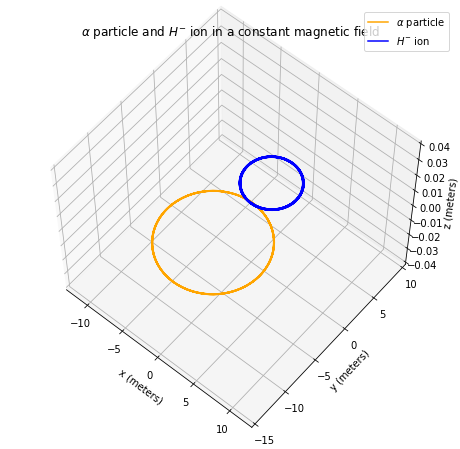

In [6]:
"""Make plot of hydrogen ion and alpha particle path in constant magnetic field."""

fig = plt.figure(figsize = (8,8))
ax = fig.gca(projection='3d')

"""Separate data into x,y, and z"""
alpha_x = alpha_path_const[0,:,0]
alpha_y = alpha_path_const[0,:,1]
alpha_z = alpha_path_const[0,:,2]
hyd_x = hyd_path_const[0,:,0]
hyd_y = hyd_path_const[0,:,1]
hyd_z = hyd_path_const[0,:,2]

ax.plot(alpha_x, alpha_y, alpha_z, label=r'$\alpha$ particle', color = 'orange')
ax.plot(hyd_x, hyd_y, hyd_z, label=r'$H^{-}$ ion', color = 'blue')
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_zlabel('z (meters)')
ax.set_xlim(-12.5,12.5)
ax.set_ylim(-15, 10)
ax.set_zlim(-0.04, 0.04)
ax.set_title(r'$\alpha$ particle and $H^{-}$ ion in a constant magnetic field')
ax.legend()
ax.view_init(elev = 60, azim = -50)

## Exercise 2##

In [16]:
"""Run the simulation for 1 second. Run 100 thousand iterations."""
timelength = 1
num_of_iters = 10**5

"""Get alpha particle path and field lines in dipole magnetic field."""

start_time = time.time()
alpha_path_dip = alpha_sys.solve_path(timelength = timelength, num_of_iters = num_of_iters, 
                                  init_pos = np.array([0,-8,2]), init_vel = np.array([0, 100, 0]), 
                                  config = 'mag_dipole')

field_lines_dip = alpha_sys.make_field_lines(config = 'mag_dipole', box_length = 20, box_cuts = 15)
end_time = time.time()


alpha_path_dip = np.array(alpha_path_dip)


print("Simulation took ----  {}  ---- seconds to run".format(end_time - start_time))
print(np.shape(alpha_path_dip))
print(np.shape(field_lines_dip))

Simulation took ----  9.295275926589966  ---- seconds to run
(2, 100001, 3)
(3, 2, 3375)


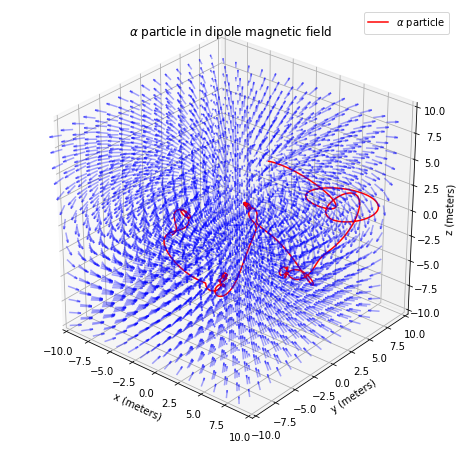

In [17]:
"""Make plot of alpha particle path in dipole magnetic field."""

fig = plt.figure(figsize = (8,8))
ax = fig.gca(projection='3d')

"""Separate data into x,y, and z"""
dip_alpha_x = alpha_path_dip[0,:,0]
dip_alpha_y = alpha_path_dip[0,:,1]
dip_alpha_z = alpha_path_dip[0,:,2]
quiv_x = field_lines_dip[0, 0, :]
quiv_y = field_lines_dip[1, 0, :]
quiv_z = field_lines_dip[2, 0, :]
quiv_u = field_lines_dip[0, 1, :]
quiv_v = field_lines_dip[1, 1, :]
quiv_w = field_lines_dip[2, 1, :]

ax.plot(dip_alpha_x, dip_alpha_y, dip_alpha_z, label=r'$\alpha$ particle', color = 'red')
ax.quiver(quiv_x, quiv_y, quiv_z, quiv_u, quiv_v, quiv_w, normalize=True, color='blue', alpha=0.35)
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_zlabel('z (meters)')
ax.set_xlim(-10,10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_title(r'$\alpha$ particle in dipole magnetic field')
ax.legend()
ax.view_init(elev = 30, azim = -50)

Now we will look at a tilted magnetic dipole field.

In [18]:
"""Run the simulation for 1 second. Run 100 thousand iterations."""
timelength = 1
num_of_iters = 10**5

"""Get alpha particle path and field lines in dipole magnetic field."""

start_time = time.time()
alpha_path_23 = alpha_sys.solve_path(timelength = timelength, num_of_iters = num_of_iters, 
                                  init_pos = np.array([0,-8, 0]), init_vel = np.array([0, 100, 0]), 
                                  config = 'mag_dipole_23')
    
field_lines_23 = alpha_sys.make_field_lines(config = 'mag_dipole_23', box_length = 20, box_cuts = 15)
end_time = time.time()

alpha_path_23 = np.array(alpha_path_23)


print("Simulation took ----  {}  ---- seconds to run".format(end_time - start_time))
print(np.shape(alpha_path_23))
print(np.shape(field_lines_23))

Simulation took ----  9.498072147369385  ---- seconds to run
(2, 100001, 3)
(3, 2, 3375)


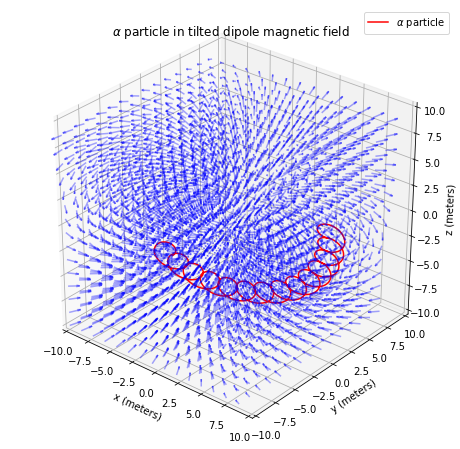

In [19]:
"""Make plot of alpha particle path in tilted dipole magnetic field."""

fig = plt.figure(figsize = (8,8))
ax = fig.gca(projection='3d')

"""Separate data into x,y, and z"""
tilt_alpha_x = alpha_path_23[0,:,0]
tilt_alpha_y = alpha_path_23[0,:,1]
tilt_alpha_z = alpha_path_23[0,:,2]
tilt_quiv_x = field_lines_23[0, 0, :]
tilt_quiv_y = field_lines_23[1, 0, :]
tilt_quiv_z = field_lines_23[2, 0, :]
tilt_quiv_u = field_lines_23[0, 1, :]
tilt_quiv_v = field_lines_23[1, 1, :]
tilt_quiv_w = field_lines_23[2, 1, :]

ax.plot(tilt_alpha_x, tilt_alpha_y, tilt_alpha_z, label=r'$\alpha$ particle', color = 'red')
ax.quiver(tilt_quiv_x, tilt_quiv_y, tilt_quiv_z, tilt_quiv_u, tilt_quiv_v, tilt_quiv_w, 
          normalize=True, color='blue', alpha=0.35)

ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_zlabel('z (meters)')
ax.set_xlim(-10,10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_title(r'$\alpha$ particle in tilted dipole magnetic field')
ax.legend()
ax.view_init(elev = 30, azim = -50)

## Exercise 3##

In [20]:
"""Run the simulation for 1 second. Run 100 thousand iterations."""
timelength = 1
num_of_iters = 10**5

"""Get alpha particle path and field lines in dipole magnetic field."""

start_time = time.time()
alpha_path_bottle = alpha_sys.solve_path(timelength = timelength, num_of_iters = num_of_iters, 
                                  init_pos = np.array([-5,0,0]), init_vel = np.array([0, 0, 100]), 
                                  config = 'mag_bottle')

field_lines_bottle = alpha_sys.make_field_lines(config = 'mag_bottle', box_length = 40, box_cuts = 15)
end_time = time.time()


alpha_path_bottle = np.array(alpha_path_bottle)


print("Simulation took ----  {}  ---- seconds to run".format(end_time - start_time))
print(np.shape(alpha_path_bottle))
print(np.shape(field_lines_bottle))

Simulation took ----  12.441607236862183  ---- seconds to run
(2, 100001, 3)
(3, 2, 3375)


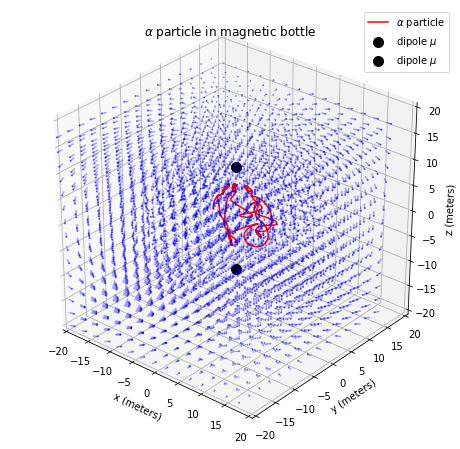

In [22]:
"""Make plot of alpha particle path in magnetic bottle field."""

fig = plt.figure(figsize = (8,8))
ax = fig.gca(projection='3d')

"""Separate data into x,y, and z"""
bot_alpha_x = alpha_path_bottle[0,:,0]
bot_alpha_y = alpha_path_bottle[0,:,1]
bot_alpha_z = alpha_path_bottle[0,:,2]
bot_quiv_x = field_lines_bottle[0, 0, :]
bot_quiv_y = field_lines_bottle[1, 0, :]
bot_quiv_z = field_lines_bottle[2, 0, :]
bot_quiv_u = field_lines_bottle[0, 1, :]
bot_quiv_v = field_lines_bottle[1, 1, :]
bot_quiv_w = field_lines_bottle[2, 1, :]

ax.plot(bot_alpha_x, bot_alpha_y, bot_alpha_z, label=r'$\alpha$ particle', color = 'red')
ax.quiver(bot_quiv_x, bot_quiv_y, bot_quiv_z, bot_quiv_u, bot_quiv_v, bot_quiv_w, 
          normalize=True, color='blue', alpha=0.35)
ax.scatter(0, 0, 10, s=100, marker='o', color = 'black', label=r'dipole $\mu$')
ax.scatter(0, 0, -10, s=100, marker='o', color = 'black', label=r'dipole $\mu$')


ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_zlabel('z (meters)')
ax.set_xlim(-20,20)
ax.set_ylim(-20, 20)
ax.set_zlim(-20, 20)
ax.set_title(r'$\alpha$ particle in magnetic bottle')
ax.legend()
ax.view_init(elev = 30, azim = -50)